In [109]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [110]:
data = pd.read_csv('./train.csv')

In [111]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Exploratory Data Analysis

In [112]:
data[data.columns[data.isna().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Cabin     204 non-null    object 
 2   Embarked  889 non-null    object 
dtypes: float64(1), object(2)
memory usage: 21.0+ KB


### 1a. Age
There are a missing values in the age column, we can possibly impute these values with median values

In [113]:
print("Passengers with missing age info : ", data[pd.isnull(data.Age)]['PassengerId'].count())
print("With Master in Name : ", data[(pd.isnull(data.Age)) & (data.Name.str.contains('Master. '))]['PassengerId'].count())
print("With Miss in Name : ", data[(pd.isnull(data.Age)) & (data.Name.str.contains('Miss. '))]['PassengerId'].count())
print("With Mrs in Name : ", data[(pd.isnull(data.Age)) & (data.Name.str.contains('Mrs. '))]['PassengerId'].count())
print("With Mr in Name : ", data[(pd.isnull(data.Age)) & (data.Name.str.contains('Mr. '))]['PassengerId'].count())

print("With Master in Name : ", data[(pd.notnull(data.Age)) & (data.Name.str.contains('Master. '))]['Age'].median())
print("With Miss in Name : ", data[(pd.notnull(data.Age)) & (data.Name.str.contains('Miss. '))]['Age'].median())
print("With Mrs in Name : ", data[(pd.notnull(data.Age)) & (data.Name.str.contains('Mrs. '))]['Age'].median())
print("With Mr in Name : ", data[(pd.notnull(data.Age)) & (data.Name.str.contains('Mr. '))]['Age'].median())

Passengers with missing age info :  177
With Master in Name :  4
With Miss in Name :  36
With Mrs in Name :  17
With Mr in Name :  119
With Master in Name :  3.5
With Miss in Name :  21.0
With Mrs in Name :  35.0
With Mr in Name :  29.5


In [114]:
data[(pd.isnull(data.Age)) & (data.Name.str.contains('Mrs. '))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C


In [115]:
master_age = data[(pd.notnull(data.Age)) & (data.Name.str.contains('Master. '))]['Age'].median()
miss_age = data[(pd.notnull(data.Age)) & (data.Name.str.contains('Miss. '))]['Age'].median()
mrs_age = data[(pd.notnull(data.Age)) & (data.Name.str.contains('Mrs. '))]['Age'].median()
mr_age = data[(pd.notnull(data.Age)) & (data.Name.str.contains('Mr. '))]['Age'].median()

def impute_age(df):
    df.loc[(pd.isnull(df.Age)) & (df.Name.str.contains('Master. ')),'Age'] = master_age
    df.loc[(pd.isnull(df.Age)) & (df.Name.str.contains('Miss. ')),'Age'] = miss_age
    df.loc[(pd.isnull(df.Age)) & (df.Name.str.contains('Mrs. ')),'Age'] = mrs_age
    df.loc[(pd.isnull(df.Age)) & (df.Name.str.contains('Mr. ')),'Age'] = mr_age

In [116]:
impute_age(data)

### 1b. Cabin
There are very few entries with a non null Cabin information. let us first just try to check if there is a correlation between Cabin and Survived.

In [117]:
data[pd.notnull(data.Cabin)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [118]:
data['hasCabin'] = data['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

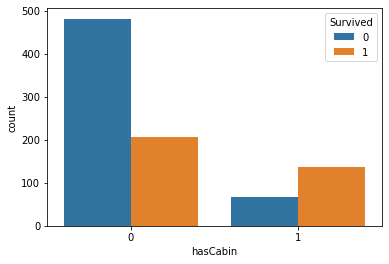

In [119]:
sns.countplot(x='hasCabin', hue='Survived', data=data)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          890 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  hasCabin     891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [121]:
# Dropping rows with null values
data.drop(data[pd.isnull(data.Age)].index, axis=0, inplace=True)
data.drop(data[pd.isnull(data.Embarked)].index, axis=0, inplace=True)

### 2. Univariate Analysis

### 2a. Age

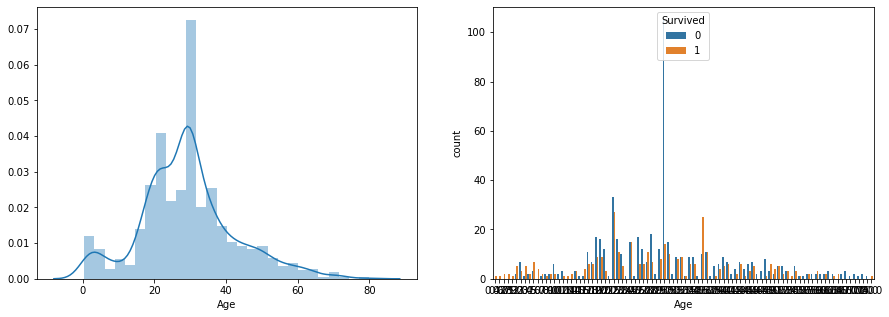

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(data['Age'], ax=axes[0])
sns.countplot(x='Age', hue='Survived', data=data, ax=axes[1])

In [123]:
def group_by_age(age):
    if (age < 2):
         return 'Infant'
    elif (age < 12):
         return 'Child'
    elif (age < 60):
         return 'Young'
    else:
         return 'Old'
    
data['AgeGroup'] = data['Age'].apply(lambda x: group_by_age(x))

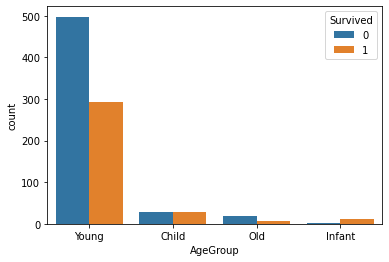

In [124]:
sns.countplot(x='AgeGroup', hue='Survived', data=data)

### 2b. Fare

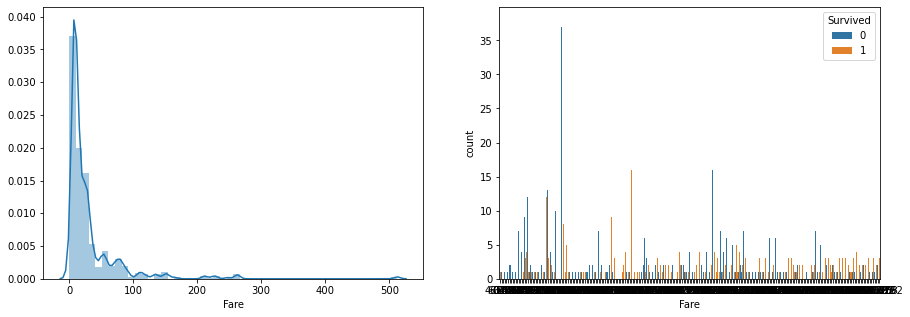

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(data['Fare'], ax=axes[0])
sns.countplot(x='Fare', hue='Survived', data=data, ax=axes[1])

In [126]:
def group_by_fare(fare, quantiles):
    for qtl, value in quantiles.items():
        if fare < value:
            return 'Qtl_' + str(int(qtl*100))
    return 'Qtl_100'

quantiles = data['Fare'].quantile([0.3, 0.8])
data['FareGroup'] = data['Fare'].apply(lambda x: group_by_fare(x, quantiles))

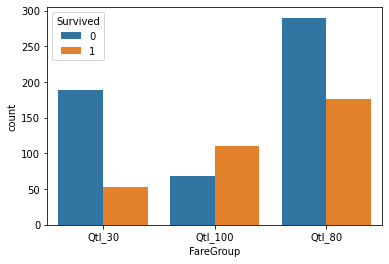

In [127]:
sns.countplot(x='FareGroup', hue='Survived', data=data)

### 2c. Pclass

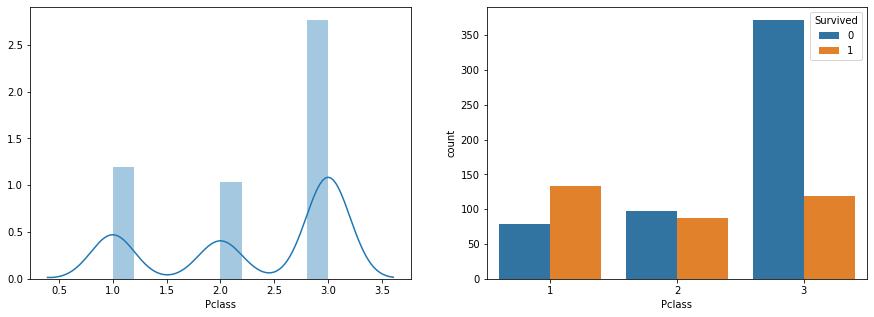

In [128]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(data['Pclass'], ax=axes[0])
sns.countplot(x='Pclass', hue='Survived', data=data, ax=axes[1])

In [129]:
data['Pclass2'] = data['Pclass'].apply(lambda x: 'Class_' + str(x))

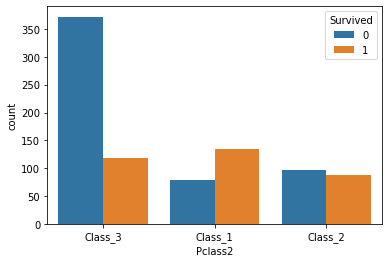

In [130]:
sns.countplot(x='Pclass2', hue='Survived', data=data)

### 2d. Sex

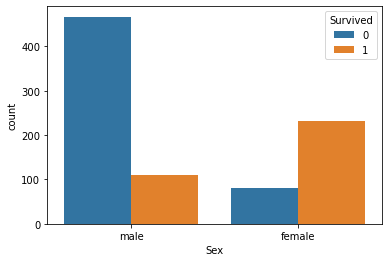

In [131]:
sns.countplot(x='Sex', hue='Survived', data=data)

### 2e. SibSp

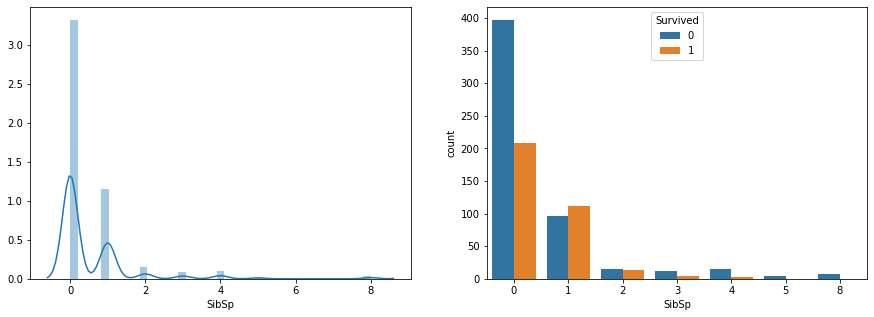

In [132]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(data['SibSp'], ax=axes[0])
sns.countplot(x='SibSp', hue='Survived', data=data, ax=axes[1])

### 2f. Parch (Parent Child)

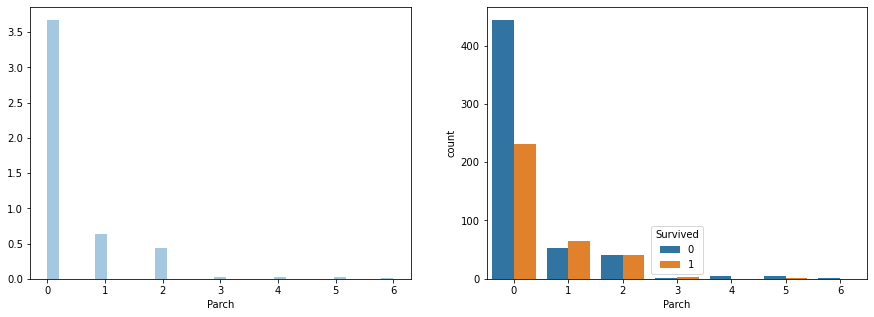

In [133]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(data['Parch'], ax=axes[0])
sns.countplot(x='Parch', hue='Survived', data=data, ax=axes[1])

In [134]:
def isFamilyWithChildren(row):
    if (row.Parch > 0):
        return 1
    return 0

data['isFamilyWithChildren'] = data.apply(lambda row: isFamilyWithChildren(row), axis=1)

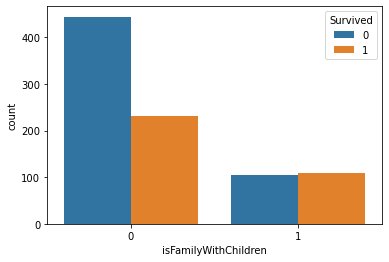

In [135]:
sns.countplot(x='isFamilyWithChildren', hue='Survived', data=data)

### 2g. Embarked

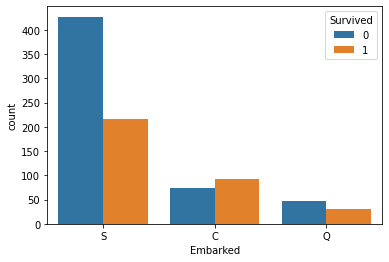

In [136]:
sns.countplot(x='Embarked', hue='Survived', data=data)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           888 non-null    int64  
 1   Survived              888 non-null    int64  
 2   Pclass                888 non-null    int64  
 3   Name                  888 non-null    object 
 4   Sex                   888 non-null    object 
 5   Age                   888 non-null    float64
 6   SibSp                 888 non-null    int64  
 7   Parch                 888 non-null    int64  
 8   Ticket                888 non-null    object 
 9   Fare                  888 non-null    float64
 10  Cabin                 202 non-null    object 
 11  Embarked              888 non-null    object 
 12  hasCabin              888 non-null    int64  
 13  AgeGroup              888 non-null    object 
 14  FareGroup             888 non-null    object 
 15  Pclass2               8

## Test Train split

In [138]:
feature_cols = ['Pclass2','Sex','AgeGroup','FareGroup','isFamilyWithChildren','Embarked', 'hasCabin']

In [139]:
X = data.filter(feature_cols, axis=1)
y = data.pop('Survived')

X = pd.get_dummies(X, drop_first=True)

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=43)

In [141]:
X.head()

,isFamilyWithChildren,hasCabin,Pclass2_Class_2,Pclass2_Class_3,Sex_male,AgeGroup_Infant,AgeGroup_Old,AgeGroup_Young,FareGroup_Qtl_30,FareGroup_Qtl_80,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,1,0,0,1
1,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,1,0,0,0,1
4,0,0,0,1,1,0,0,1,0,1,0,1


### Using Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
logreg = LogisticRegression()

In [144]:
model = logreg.fit(X_train, y_train)

In [145]:
print(model.coef_)

[[-0.19273527  0.86159117 -0.08756588 -1.18569964 -2.33158597  1.53405463
  -1.38750243 -1.00202519 -0.14069675 -0.0784011   0.08894828 -0.49285999]]


In [146]:
y_test_proba = model.predict_proba(X_test)
y_test_pred = model.predict(X_test, )

In [147]:
metrics.accuracy_score(y_test, y_test_pred)

0.8277153558052435

In [148]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[148,  21],
       [ 25,  73]], dtype=int64)

(0.0, 1.0)

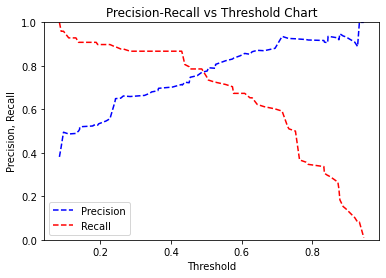

In [149]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba[:,1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

### Using Naive Bayes

In [150]:
from sklearn.naive_bayes import GaussianNB

In [151]:
# instantiate the model
gnb = GaussianNB()

In [152]:
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [153]:
y_test_pred = gnb.predict(X_test)

In [154]:
metrics.accuracy_score(y_test, y_test_pred)

0.6367041198501873

### Using Random Forest    

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
model_Forest = RandomForestClassifier(n_estimators=21, random_state=39)
model_Forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=21, random_state=39)

In [157]:
y_test_pred = model_Forest.predict(X_test)

In [158]:
metrics.accuracy_score(y_test, y_test_pred)

0.8426966292134831

## Predicting the class for the actual data

In [159]:
def prepare_data(test_data):
    impute_age(test_data)
    test_data['AgeGroup'] = test_data['Age'].apply(lambda x: group_by_age(x))
    test_data['FareGroup'] = test_data['Fare'].apply(lambda x: group_by_fare(x, quantiles))
    test_data['isFamilyWithChildren'] = test_data.apply(lambda row: isFamilyWithChildren(row), axis=1)
    test_data['Pclass2'] = test_data['Pclass'].apply(lambda x: 'Class_' + str(x))
    test_data['hasCabin'] = test_data['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
   
    test_data2 = test_data[feature_cols]
    return pd.get_dummies(test_data2, drop_first=True)

In [160]:
test_data = pd.read_csv('./test.csv')
test_data2 = prepare_data(test_data)

In [161]:
test_data['Survived'] = model_Forest.predict(test_data2)

In [162]:
test_data[['PassengerId', 'Survived']].to_csv('./result.csv', index=False)